In [1]:
# imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import os

In [2]:
# settings
sns.set()
%matplotlib inline

In [3]:
# extract the archive; change directory; show csv files
![[ ! -d CSVs ]] && tar -xvf csvs.tar.xz || echo "Archive already extracted!"

%cd CSVs/
!ls *.csv


Archive already extracted!
/home/aves/Repos/VAERS/CSVs
2021VAERSDATA.csv
2021VAERSSYMPTOMS.csv
2021VAERSVAX.csv
Conditions_Contributing_to_COVID-19_Deaths__by_State_and_Age.csv


In [4]:
def unique_symptoms(VAERS_SYMPTOMS):
    s1 = list(VAERS_SYMPTOMS['SYMPTOM1'].unique())
    s2 = list(VAERS_SYMPTOMS['SYMPTOM2'].unique())
    s3 = list(VAERS_SYMPTOMS['SYMPTOM3'].unique())
    s4 = list(VAERS_SYMPTOMS['SYMPTOM4'].unique())
    s5 = list(VAERS_SYMPTOMS['SYMPTOM5'].unique())
    ss = s1 + s2 + s3 + s4 + s5
    S = pd.Series(ss).unique()
    return S

def all_symptoms(VAERS_SYMPTOMS):
    pass

def get_vax_type(vaers_id):
    return VAERS_VAX.loc[VAERS_VAX['VAERS_ID']==vaers_id]['VAX_TYPE'].to_string().split(' ')[-1]

# NEEDS WORK: not all names caught by [-1] index:
def get_vax_maker(vaers_id):
    return VAERS_VAX.loc[VAERS_VAX['VAERS_ID']==vaers_id]['VAX_MANU'].to_string().split(' ')[-1]

def get_vax_lot(vaers_id):
    return VAERS_VAX.loc[VAERS_VAX['VAERS_ID']==vaers_id]['VAX_LOT'].to_string().split(' ')[-1]

def get_vax_dose(vaers_id):
    return VAERS_VAX.loc[VAERS_VAX['VAERS_ID']==vaers_id]['VAX_DOSE_SERIES'].to_string().split(' ')[-1]

def get_maker_from_lot(lot):
    try:
        return list(VAERS_VAX.loc[VAERS_VAX['VAX_LOT']==lot]['VAX_MANU'])[0]
    except (KeyError, IndexError):
        return ''

In [5]:
# load VAERSDATA CSV
VAERS_DATA = pd.read_csv('2021VAERSDATA.csv', encoding='cp1252')
VAERS_DATA.head(5)

/home/aves/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (7,12,23) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,VAERS_ID,RECVDATE,STATE,AGE_YRS,CAGE_YR,CAGE_MO,SEX,RPT_DATE,SYMPTOM_TEXT,DIED,...,CUR_ILL,HISTORY,PRIOR_VAX,SPLTTYPE,FORM_VERS,TODAYS_DATE,BIRTH_DEFECT,OFC_VISIT,ER_ED_VISIT,ALLERGIES
0,916600,01/01/2021,TX,33.0,33.0,NaN,F,NaN,Right side of epiglottis swelled up and hinder...,NaN,...,None,None,NaN,NaN,2,01/01/2021,NaN,Y,NaN,Pcn and bee venom
1,916601,01/01/2021,CA,73.0,73.0,NaN,F,NaN,Approximately 30 min post vaccination administ...,NaN,...,Patient residing at nursing facility. See pati...,Patient residing at nursing facility. See pati...,NaN,NaN,2,01/01/2021,NaN,Y,NaN,"""Dairy"""
2,916602,01/01/2021,WA,23.0,23.0,NaN,F,NaN,"About 15 minutes after receiving the vaccine, ...",NaN,...,None,None,NaN,NaN,2,01/01/2021,NaN,NaN,Y,Shellfish
3,916603,01/01/2021,WA,58.0,58.0,NaN,F,NaN,"extreme fatigue, dizziness,. could not lift my...",NaN,...,kidney infection,"diverticulitis, mitral valve prolapse, osteoar...","got measles from measel shot, mums from mumps ...",NaN,2,01/01/2021,NaN,NaN,NaN,"Diclofenac, novacaine, lidocaine, pickles, tom..."
4,916604,01/01/2021,TX,47.0,47.0,NaN,F,NaN,"Injection site swelling, redness, warm to the ...",NaN,...,Na,NaN,NaN,NaN,2,01/01/2021,NaN,NaN,NaN,Na


In [6]:
# VAERS_DATA CSV Basic Information
print('VAERS_DATA:'); print()
print('Column Headers:\t', VAERS_DATA.columns); print()
print('Rows, Columns:\t', VAERS_DATA.shape); print()
print('Women reporting adverse reactions:\t', len([x for x in VAERS_DATA['SEX'] if x == 'F']))
print('Men reporting adverse reactions:\t', len([x for x in VAERS_DATA['SEX'] if x == 'M']))
print()

DIED_DF = VAERS_DATA[VAERS_DATA['DIED']=='Y']
DEATH_IDS = DIED_DF['VAERS_ID']
print('number of deaths:\t', len(DEATH_IDS))

ER_VISIT_DF = VAERS_DATA[VAERS_DATA['ER_VISIT']=='Y']
ER_VISIT_IDS = ER_VISIT_DF['VAERS_ID']
print('number of er visits:\t', len(ER_VISIT_IDS))

DISABLE_DF = VAERS_DATA[VAERS_DATA['DISABLE']=='Y']
DISABLE_IDS = DISABLE_DF['VAERS_ID']
print('number of disabilities:\t', len(DISABLE_IDS))

VAERS_DATA:

Column Headers:	 Index(['VAERS_ID', 'RECVDATE', 'STATE', 'AGE_YRS', 'CAGE_YR', 'CAGE_MO', 'SEX',
       'RPT_DATE', 'SYMPTOM_TEXT', 'DIED', 'DATEDIED', 'L_THREAT', 'ER_VISIT',
       'HOSPITAL', 'HOSPDAYS', 'X_STAY', 'DISABLE', 'RECOVD', 'VAX_DATE',
       'ONSET_DATE', 'NUMDAYS', 'LAB_DATA', 'V_ADMINBY', 'V_FUNDBY',
       'OTHER_MEDS', 'CUR_ILL', 'HISTORY', 'PRIOR_VAX', 'SPLTTYPE',
       'FORM_VERS', 'TODAYS_DATE', 'BIRTH_DEFECT', 'OFC_VISIT', 'ER_ED_VISIT',
       'ALLERGIES'],
      dtype='object')

Rows, Columns:	 (418781, 35)

Women reporting adverse reactions:	 291743
Men reporting adverse reactions:	 116467

number of deaths:	 5626
number of er visits:	 51
number of disabilities:	 6295


In [7]:
DEATHS = []
for key in DEATH_IDS.keys():
    DEATHS.append(VAERS_DATA.loc[VAERS_DATA['VAERS_ID']==DEATH_IDS[key]])

ages, male_fatalities, female_fatalities = [], [], []
for DEATH in DEATHS:
    if (DEATH['SEX'] == 'M').bool():
        male_fatalities.append(DEATH)
    elif (DEATH['SEX'] == 'F').bool:
        female_fatalities.append(DEATH)
    try:
        ages.append(int(DEATH['AGE_YRS']))
    except ValueError:
        pass

print('Male fatalities:\t', len(male_fatalities))
print('Female fatalities:\t', len(female_fatalities))
print('Average age:\t', np.mean(ages))
print('Standard deviation of age:\t', np.std(ages))


Male fatalities:	 3077
Female fatalities:	 2549
Average age:	 72.99228989976869
Standard deviation of age:	 16.49880075310533


(array([  21.,   41.,   64.,  153.,  271.,  647., 1307., 1315., 1185.,
         184.]),
 array([  0. ,  10.6,  21.2,  31.8,  42.4,  53. ,  63.6,  74.2,  84.8,
         95.4, 106. ]),
 <BarContainer object of 10 artists>)

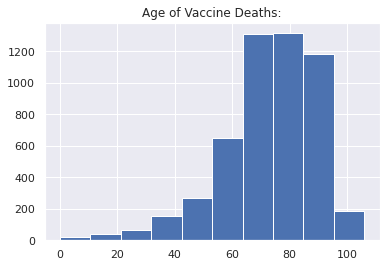

In [8]:
plt.title('Age of Vaccine Deaths:')
plt.hist(ages)

In [9]:
er_visits = []
for key in ER_VISIT_IDS.keys():
    er_visits.append(VAERS_DATA.loc[VAERS_DATA['VAERS_ID']==ER_VISIT_IDS[key]])

age_hospitalized, men_hospitalized, women_hospitalized = [], [], []
for visit in er_visits:
    if (visit['SEX'] == 'M').bool():
        men_hospitalized.append(visit)
    elif (visit['SEX'] == 'F').bool():
        women_hospitalized.append(visit)
    try:
        age_hospitalized.append(int(visit['AGE_YRS']))
    except ValueError:
        pass

print('Men hospitalized:\t', len(men_hospitalized))
print('Women hospitalized:\t', len(women_hospitalized))
print('Average age:\t', np.mean(age_hospitalized))
print('Standard deviation of age:\t', np.std(age_hospitalized))

Men hospitalized:	 16
Women hospitalized:	 33
Average age:	 42.83673469387755
Standard deviation of age:	 23.495850210045134


(array([3., 8., 4., 3., 8., 6., 6., 6., 3., 2.]),
 array([ 1., 10., 19., 28., 37., 46., 55., 64., 73., 82., 91.]),
 <BarContainer object of 10 artists>)

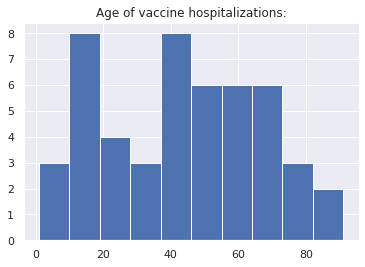

In [10]:
plt.title('Age of vaccine hospitalizations:')
plt.hist(age_hospitalized)

In [11]:
disabilities = []
for key in DISABLE_IDS.keys():
    disabilities.append(VAERS_DATA.loc[VAERS_DATA['VAERS_ID']==DISABLE_IDS[key]])

age_disabled, men_disabled, women_disabled = [], [], []
for disability in disabilities:
    if (disability['SEX'] == 'M').bool():
        men_disabled.append(disability)
    elif (disability['SEX'] == 'F').bool():
        women_disabled.append(disability)
    try:
        age_disabled.append(int(disability['AGE_YRS']))
    except ValueError:
        pass

print('Men disabled:\t', len(men_disabled))
print('Women disabled:\t', len(women_disabled))
print('Average age:\t', np.mean(age_disabled))
print('Standard deviation of age:\t', np.std(age_disabled))

Men disabled:	 2609
Women disabled:	 3600
Average age:	 55.843292181069955
Standard deviation of age:	 17.693917088048803


(array([  36.,  122.,  354.,  854., 1029., 1220., 1385.,  711.,  313.,
          51.]),
 array([  0. ,  10.3,  20.6,  30.9,  41.2,  51.5,  61.8,  72.1,  82.4,
         92.7, 103. ]),
 <BarContainer object of 10 artists>)

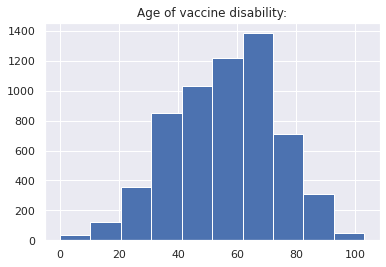

In [12]:
plt.title('Age of vaccine disability:')
plt.hist(age_disabled)

In [13]:
# load VAERS SYMPTOMS CSV
VAERS_SYMPTOMS = pd.read_csv('2021VAERSSYMPTOMS.csv', encoding='cp1252')
VAERS_SYMPTOMS.head(5)

,VAERS_ID,SYMPTOM1,SYMPTOMVERSION1,SYMPTOM2,SYMPTOMVERSION2,SYMPTOM3,SYMPTOMVERSION3,SYMPTOM4,SYMPTOMVERSION4,SYMPTOM5,SYMPTOMVERSION5
0,916600,Dysphagia,23.1,Epiglottitis,23.1,NaN,NaN,NaN,NaN,NaN,NaN
1,916601,Anxiety,23.1,Dyspnoea,23.1,NaN,NaN,NaN,NaN,NaN,NaN
2,916602,Chest discomfort,23.1,Dysphagia,23.1,Pain in extremity,23.1,Visual impairment,23.1,NaN,NaN
3,916603,Dizziness,23.1,Fatigue,23.1,Mobility decreased,23.1,NaN,NaN,NaN,NaN
4,916604,Injection site erythema,23.1,Injection site pruritus,23.1,Injection site swelling,23.1,Injection site warmth,23.1,NaN,NaN


In [14]:
#print basic information on VAERS SYMPTOMS CSV
print('VAERS_SYMPTOMS:'); print()
print('Columns:', VAERS_SYMPTOMS.columns); print()
print('Shape:', VAERS_SYMPTOMS.shape); print()

symptoms = unique_symptoms(VAERS_SYMPTOMS)
print('Unique symptoms:\t', len(symptoms))

VAERS_SYMPTOMS:

Columns: Index(['VAERS_ID', 'SYMPTOM1', 'SYMPTOMVERSION1', 'SYMPTOM2',
       'SYMPTOMVERSION2', 'SYMPTOM3', 'SYMPTOMVERSION3', 'SYMPTOM4',
       'SYMPTOMVERSION4', 'SYMPTOM5', 'SYMPTOMVERSION5'],
      dtype='object')

Shape: (561558, 11)

Unique symptoms:	 9080


In [15]:
# load VAERS VAX CSV
VAERS_VAX = pd.read_csv('2021VAERSVAX.csv', encoding='cp1252')
VAERS_VAX.head(5)

,VAERS_ID,VAX_TYPE,VAX_MANU,VAX_LOT,VAX_DOSE_SERIES,VAX_ROUTE,VAX_SITE,VAX_NAME
0,916600,COVID19,MODERNA,037K20A,1,IM,LA,COVID19 (COVID19 (MODERNA))
1,916601,COVID19,MODERNA,025L20A,1,IM,RA,COVID19 (COVID19 (MODERNA))
2,916602,COVID19,PFIZER\BIONTECH,EL1284,1,IM,LA,COVID19 (COVID19 (PFIZER-BIONTECH))
3,916603,COVID19,MODERNA,unknown,UNK,NaN,NaN,COVID19 (COVID19 (MODERNA))
4,916604,COVID19,MODERNA,NaN,1,IM,LA,COVID19 (COVID19 (MODERNA))


In [16]:
# print basic information on VAERS VAX CSV
print('VAERS_VAX:'); print()
print('Columns:', VAERS_VAX.columns); print()
print('Shape:', VAERS_VAX.shape); print()

VAERS_VAX:

Columns: Index(['VAERS_ID', 'VAX_TYPE', 'VAX_MANU', 'VAX_LOT', 'VAX_DOSE_SERIES',
       'VAX_ROUTE', 'VAX_SITE', 'VAX_NAME'],
      dtype='object')

Shape: (434899, 8)



In [17]:
from collections import OrderedDict

lots = []
for id in DEATH_IDS:
    lots.append(get_vax_lot(id))

lot_names = pd.Series(lots).unique()
lot_totals = {}
for name in lot_names:
    lot_totals[name] = (lots.count(name), get_maker_from_lot(name))

fatal_lots = OrderedDict(
    {k: v for k, v in sorted(
        lot_totals.items(), key=lambda item: item[1][0], reverse=True
    )}
)

In [18]:
for k, v in list(fatal_lots.items())[2:]:
    print(k, v)

EN6201 (77, 'PFIZER\\BIONTECH')
EN5318 (63, 'PFIZER\\BIONTECH')
EM9810 (55, 'PFIZER\\BIONTECH')
EN6200 (52, 'PFIZER\\BIONTECH')
039K20A (51, 'MODERNA')
010M20A (49, 'MODERNA')
EN6198 (48, 'PFIZER\\BIONTECH')
012L20A (47, 'MODERNA')
013L20A (47, 'MODERNA')
EL3249 (45, 'PFIZER\\BIONTECH')
EL3248 (43, 'PFIZER\\BIONTECH')
EL9261 (40, 'PFIZER\\BIONTECH')
037K20A (38, 'MODERNA')
EL8982 (38, 'PFIZER\\BIONTECH')
EL9269 (37, 'PFIZER\\BIONTECH')
EL9264 (37, 'PFIZER\\BIONTECH')
EL3302 (36, 'PFIZER\\BIONTECH')
EN6202 (36, 'PFIZER\\BIONTECH')
026A21A (36, 'MODERNA')
029L20A (35, 'MODERNA')
027L20A (34, 'MODERNA')
EK9231 (33, 'PFIZER\\BIONTECH')
025L20A (32, 'MODERNA')
012M20A (32, 'MODERNA')
EN6208 (32, 'PFIZER\\BIONTECH')
025J20-2A (31, 'MODERNA')
026L20A (31, 'MODERNA')
015M20A (30, 'MODERNA')
EL0140 (29, 'PFIZER\\BIONTECH')
unknown (29, 'MODERNA')
007M20A (29, 'MODERNA')
EN6199 (29, 'PFIZER\\BIONTECH')
EJ1685 (28, 'PFIZER\\BIONTECH')
ER2613 (28, 'PFIZER\\BIONTECH')
EL1284 (27, 'PFIZER\\BIONTECH'

In [19]:
# load COVID DEATHS CSV
COVID_DEATHS = pd.read_csv('Conditions_Contributing_to_COVID-19_Deaths__by_State_and_Age.csv')
COVID_DEATHS.head(5)

,Data As Of,Start Date,End Date,Group,Year,Month,State,Condition Group,Condition,ICD10_codes,Age Group,COVID-19 Deaths,Number of Mentions,Flag
0,07/25/2021,01/01/2020,07/24/2021,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,445.0,464.0,NaN
1,07/25/2021,01/01/2020,07/24/2021,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,25-34,2001.0,2054.0,NaN
2,07/25/2021,01/01/2020,07/24/2021,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,35-44,5342.0,5488.0,NaN
3,07/25/2021,01/01/2020,07/24/2021,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,45-54,15753.0,16225.0,NaN
4,07/25/2021,01/01/2020,07/24/2021,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,55-64,39490.0,40602.0,NaN


In [20]:
# print basic information on COVID DEATHS CSV
print('Column headers:\t', COVID_DEATHS.columns); print()
print('Rows, Columns:\t', COVID_DEATHS.shape); print()
print('Condition Groups:\t', COVID_DEATHS['Condition Group'].unique()); print()
print('Conditions:\t', COVID_DEATHS['Condition'].unique()); print()
print('Age Groups:\t', COVID_DEATHS['Age Group'].unique()); print()

Column headers:	 Index(['Data As Of', 'Start Date', 'End Date', 'Group', 'Year', 'Month',
       'State', 'Condition Group', 'Condition', 'ICD10_codes', 'Age Group',
       'COVID-19 Deaths', 'Number of Mentions', 'Flag'],
      dtype='object')

Rows, Columns:	 (273240, 14)

Condition Groups:	 ['Respiratory diseases' 'Circulatory diseases' 'Sepsis'
 'Malignant neoplasms' 'Diabetes' 'Obesity' 'Alzheimer disease'
 'Vascular and unspecified dementia' 'Renal failure'
 'Intentional and unintentional injury, poisoning, and other adverse events'
 'All other conditions and causes (residual)' 'COVID-19']

Conditions:	 ['Influenza and pneumonia' 'Chronic lower respiratory diseases'
 'Adult respiratory distress syndrome' 'Respiratory failure'
 'Respiratory arrest' 'Other diseases of the respiratory system'
 'Hypertensive diseases' 'Ischemic heart disease' 'Cardiac arrest'
 'Cardiac arrhythmia' 'Heart failure' 'Cerebrovascular diseases'
 'Other diseases of the circulatory system' 'Sepsis' 'Maligna